# Easy

Построить прогноз по одной марке машин при помощи решающих деревьев, взять только числовые признаки.

В качестве метрики взять r2_score. Оценить важность признаков, проинтерпретировать модель.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../data/UKcars/merc.csv")

In [3]:
print(f"data size: {data.shape}")

data size: (13119, 9)


In [4]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [5]:
y = data['price']
X = data.drop(columns=["price", "model", "transmission", "fuelType"])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(10495, 5)

In [8]:
model_rf = RandomForestRegressor(max_depth=15, min_samples_leaf=10)

In [9]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10)

In [10]:
train_pred = model_rf.predict(X_train)
test_pred = model_rf.predict(X_test)

In [11]:
train_r2_score = r2_score(train_pred, y_train)
test_r2_score = r2_score(test_pred, y_test)

print('Train_score: ', round(train_r2_score, 4))
print(' Test_score: ', round(test_r2_score, 4))

Train_score:  0.894
 Test_score:  0.851


# Feature Importance

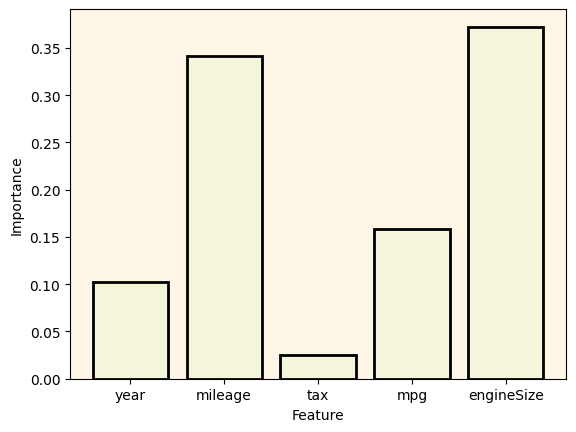

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.bar(X_train.columns, model_rf.feature_importances_, color="beige", 
        edgecolor="black", linewidth=2.0)
ax.set_facecolor("oldlace")
plt.show()

Interpretation of the model:

```mileage``` and ```engineSize``` play a huge role in the cost of a car <br>
```tax``` doesn't really impact a car's price

# Medium

Объединить в один датафрейм данные по всем маркам машин. 

Преобразовать категориальные признаки.

Построить еще несколько моделей, используя подбор гиперпараметров.

Сравнить между собой все построенные модели.

In [13]:
files_to_merge = ["../data/UKcars/" + file for file in os.listdir("../data/UKcars")]
files_to_merge

['../data/UKcars/hyundi.csv',
 '../data/UKcars/cclass.csv',
 '../data/UKcars/ford.csv',
 '../data/UKcars/toyota.csv',
 '../data/UKcars/audi.csv',
 '../data/UKcars/focus.csv',
 '../data/UKcars/merc.csv',
 '../data/UKcars/vw.csv',
 '../data/UKcars/skoda.csv',
 '../data/UKcars/bmw.csv',
 '../data/UKcars/vauxhall.csv']

In [14]:
datasets_to_merge = [pd.read_csv(files_to_merge[i]) for i in range(len(files_to_merge))]

We can observe that some datasets contain a column 'tax(£)' or 'tax', but other doesn't contain <br>
this column. As a solution, let's merely drop this feature

In [15]:
for i in range(len(datasets_to_merge)):
    dataset_columns = datasets_to_merge[i].columns
    for column in ["tax", "tax(£)"]:
        if column in dataset_columns:
            datasets_to_merge[i] = datasets_to_merge[i].drop(columns=column)

In [16]:
data = pd.concat(datasets_to_merge)

In [17]:
data.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,51.4,2.0


In [18]:
data = pd.get_dummies(data)

In [19]:
data.shape

(108540, 209)

In [20]:
data = data.dropna()

In [21]:
data.shape

(99187, 209)

In [22]:
y = data['price']
X = data.drop(columns='price')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
params = {
    'n_estimators': [30, 50, 70],
    'max_depth': [10, 15],
    'min_samples_leaf': [10, 15]
}

In [25]:
search = GridSearchCV(RandomForestRegressor(), params, verbose=True)
search.fit(X_train, y_train)
best_estimator = search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [26]:
best_estimator

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=70)

In [27]:
train_pred = best_estimator.predict(X_train)
test_pred = best_estimator.predict(X_test)

train_r2_score = r2_score(train_pred, y_train)
test_r2_score = r2_score(test_pred, y_test)

print('Train_score: ', round(train_r2_score, 4))
print(' Test_score: ', round(test_r2_score, 4))

Train_score:  0.9284
 Test_score:  0.922
